# Uber Rides Data Analysis

In [141]:
import numpy as np 
import pandas as pd 
import plotly.express as px
from matplotlib import pyplot as plt
from dateutil.parser import parse
import seaborn as sns

In [39]:
df =pd.read_csv('UberDataset.csv')

In [40]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [42]:
df.isna().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

## Data Cleaning

### Handling the Start and End DateTime 

In [43]:
df.dropna(subset=['END_DATE'], inplace=True)

In [46]:
# Parsing to class: datetime 
df['START_DATE'] = df['START_DATE'].apply(lambda x: parse(x))
df['END_DATE'] = df['END_DATE'].apply(lambda x: parse(x))

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


### Handling the empty purpose of the trip column

In [61]:
df['PURPOSE'] = df['PURPOSE'].fillna('Unknown')

In [62]:
df.isna().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

### Checking and handling duplicated data

In [73]:
df.duplicated().sum()

1

In [75]:
df.drop_duplicates(inplace=True) 

## Feature Engineering 

In [63]:
# Adding duration of the trip as a feature
# Duration in minutes
df['TRIP_DURATION'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60

In [68]:
# Adding day of week and hour of day as feature for START_DATE
# Monday = 0, Sunday = 6
days_map = {
    'monday':0,'tuesday':1,
    'wednesday':2,'thursday':3,
    'friday':4,'saturday':5,
    'sunday':6,
}
df['DAY_OF_WEEK'] = df['START_DATE'].dt.dayofweek
df['HOUR_OF_DAY'] = df['START_DATE'].dt.hour

In [80]:
# Adding a long trip flag
# the threshold for long trip can be determined by mean or median value, for that
# lets look at the distribution of miles

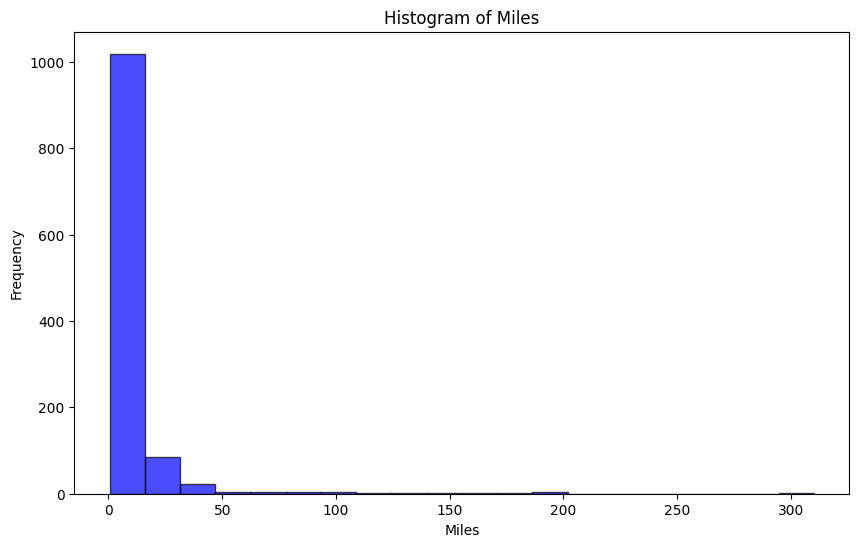

In [85]:
df['MILES'].plot(kind='hist', bins=20, figsize=(10, 6), color='blue', edgecolor='black', alpha=0.7)

plt.title('Histogram of Miles')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

In [108]:
# As data is skewed we calculate geometric mean
from scipy.stats import gmean
mean = round(gmean(df['MILES']), 4)

In [109]:
df['LONG_TRIP'] = df['MILES'].apply(lambda x: 'yes' if x>mean else 'no')

In [110]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TRIP_DURATION,DAY_OF_WEEK,HOUR,LOG_MILES,LONG_TRIP
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,4,21,1.808289,no
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,12.0,5,1,1.791759,no
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,5,20,1.757858,no
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,1,17,1.740466,no
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,2,14,4.169761,yes


## EDA

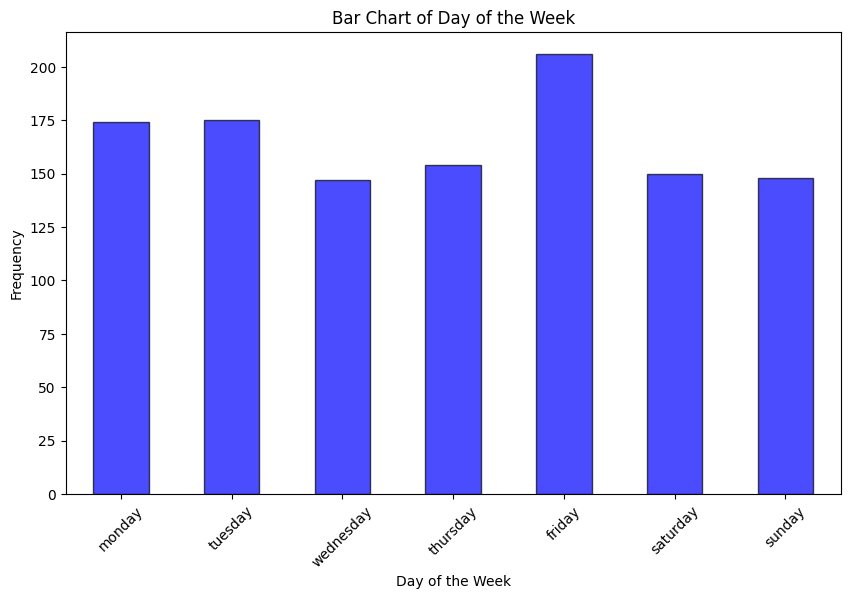

In [113]:
df['DAY_OF_WEEK'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6), color='blue', edgecolor='black', alpha=0.7)

plt.title('Bar Chart of Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')

plt.xticks(ticks=range(7), labels=days_map.keys(), rotation=45)

plt.show()

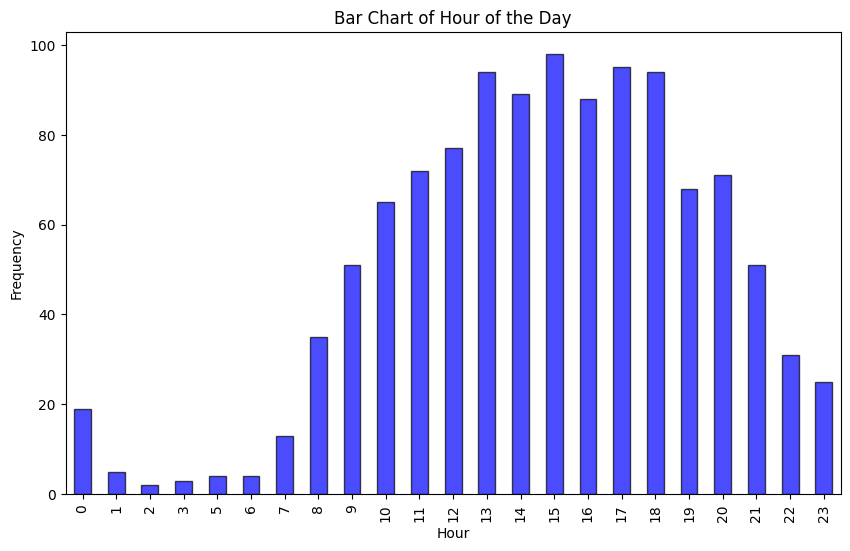

In [140]:
df['HOUR'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6), color='blue', edgecolor='black', alpha=0.7)

plt.title('Bar Chart of Trips by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Frequency')

#plt.xticks(rotation=45)

plt.show()

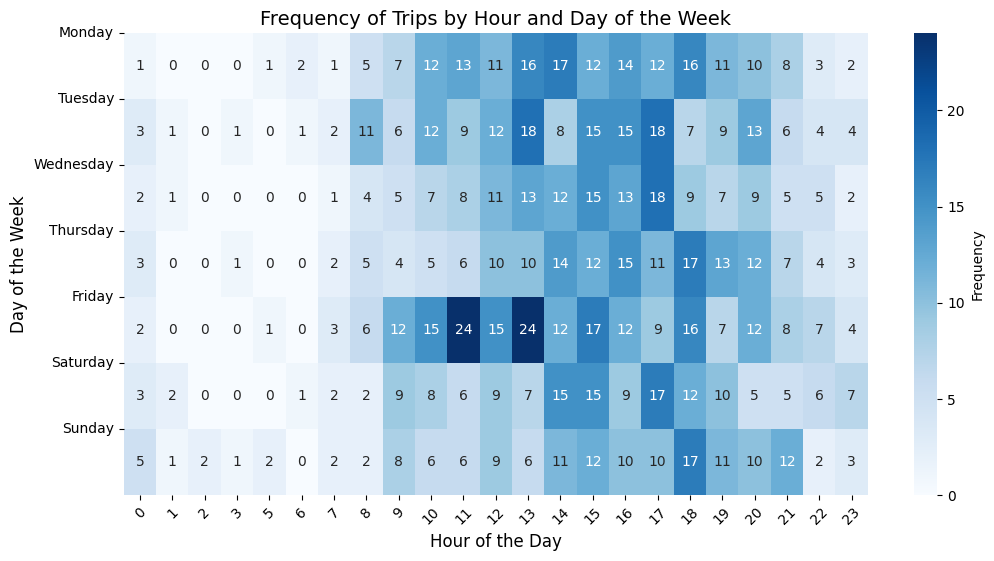

In [156]:
hour_day_pivot = df.pivot_table(
    index='DAY_OF_WEEK', 
    columns='HOUR', 
    values='MILES', 
    aggfunc='count', 
    fill_value=0
)

hour_day_pivot = hour_day_pivot.sort_index()

plt.figure(figsize=(12, 6))
sns.heatmap(
    hour_day_pivot, 
    cmap='Blues', 
    annot=True, 
    fmt='d', 
    cbar_kws={'label': 'Frequency'}
)

plt.yticks(ticks=range(7), labels=[reverse_days_map[d] for d in hour_day_pivot.index], rotation=0)
plt.title('Frequency of Trips by Hour and Day of the Week', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)
plt.xticks(rotation=45)
plt.show()


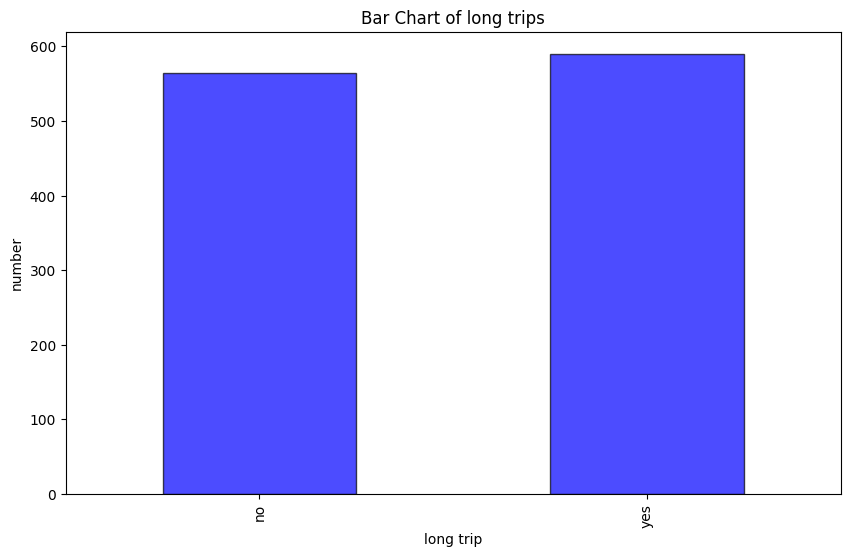

In [116]:
df['LONG_TRIP'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6), color='blue', edgecolor='black', alpha=0.7)

plt.title('Bar Chart of long trips')
plt.xlabel('long trip')
plt.ylabel('number')
plt.show()

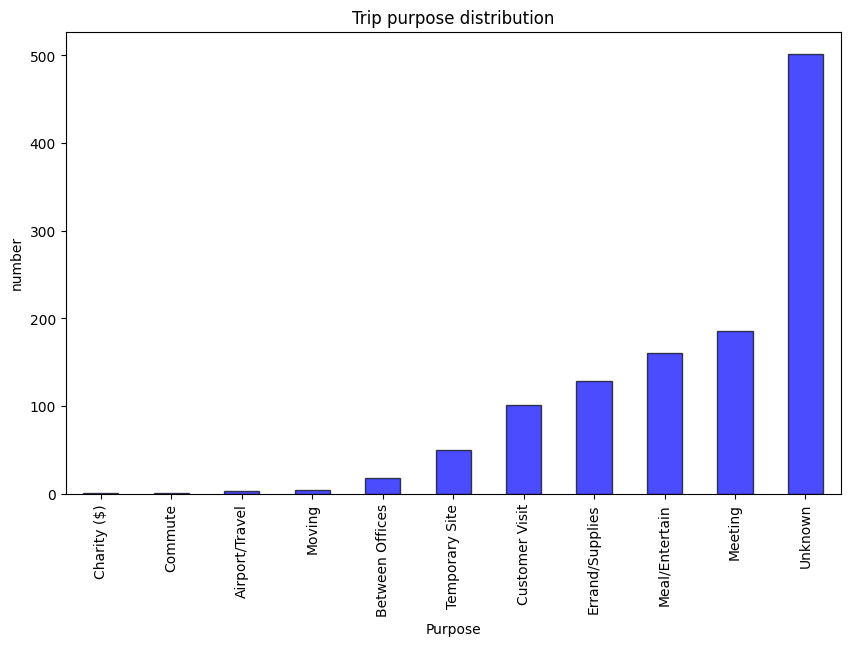

In [138]:
df['PURPOSE'].value_counts().sort_values().plot(kind='bar', figsize=(10, 6), color='blue', edgecolor='black', alpha=0.7)

plt.title('Trip purpose distribution')
plt.xlabel('Purpose')
plt.ylabel('number')

plt.xticks(rotation=90)

plt.show()

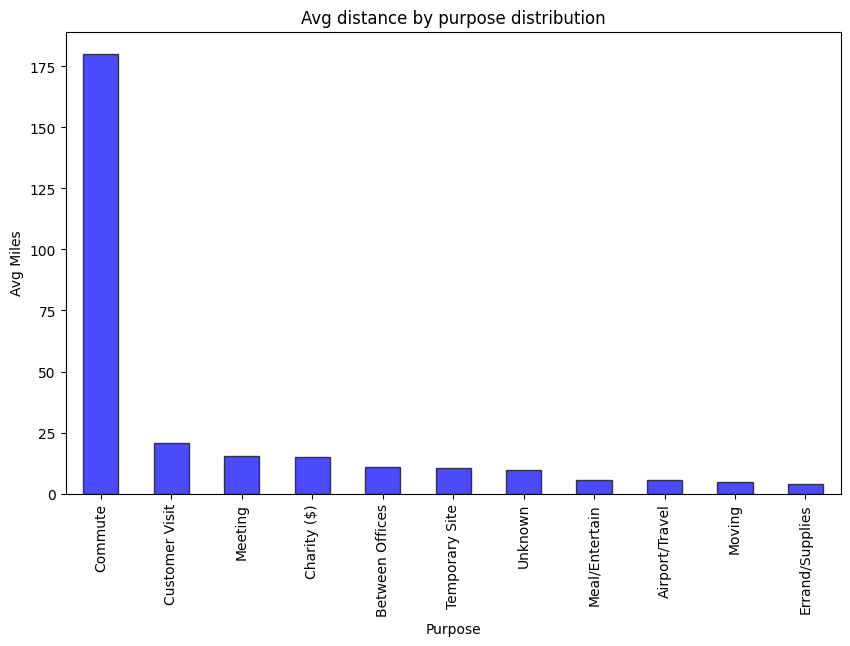

In [137]:
avg_distance_by_purpose = df.groupby('PURPOSE')['MILES'].mean().sort_values(ascending=False)

avg_distance_by_purpose.plot(kind='bar', figsize=(10, 6), color='blue', edgecolor='black', alpha=0.7)

plt.title('Avg distance by purpose distribution')
plt.xlabel('Purpose')
plt.ylabel('Avg Miles')

plt.xticks(rotation=90)

plt.show()

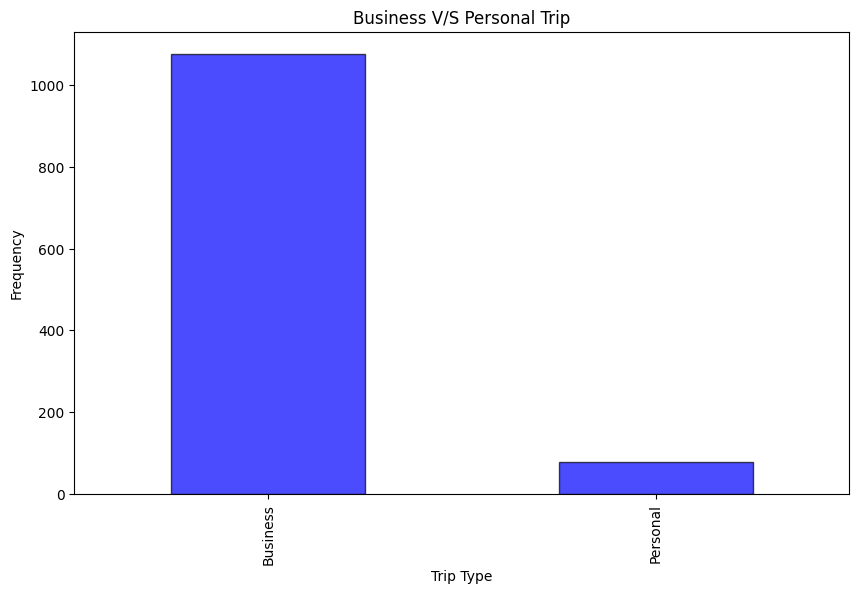

In [136]:
df['CATEGORY'].value_counts().plot(kind='bar', figsize=(10, 6), color='blue', edgecolor='black', alpha=0.7)

plt.title('Business V/S Personal Trip')
plt.xlabel('Trip Type')
plt.ylabel('Frequency')
plt.show()

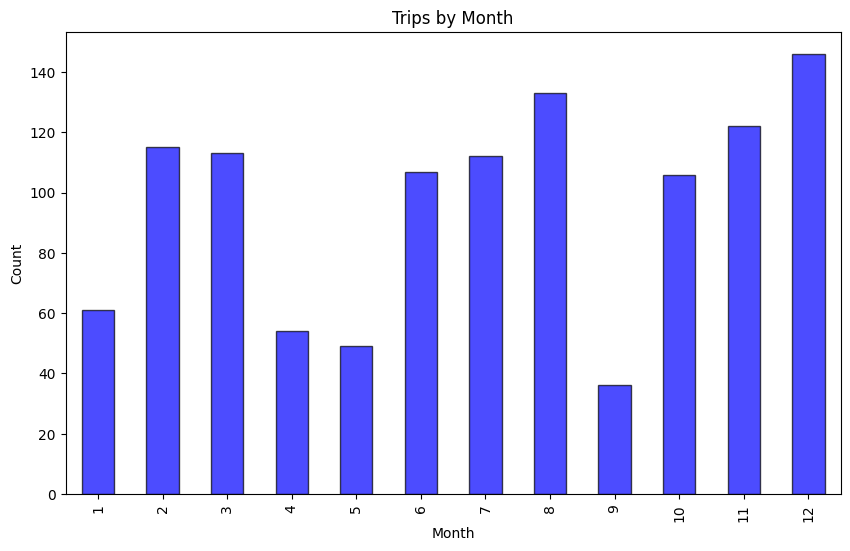

In [158]:
df['MONTH'] = df['START_DATE'].dt.month
monthly_trips = df['MONTH'].value_counts().sort_index()
monthly_trips.plot(kind='bar',figsize=(10, 6), color='blue', edgecolor='black', alpha=0.7)
plt.title('Trips by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

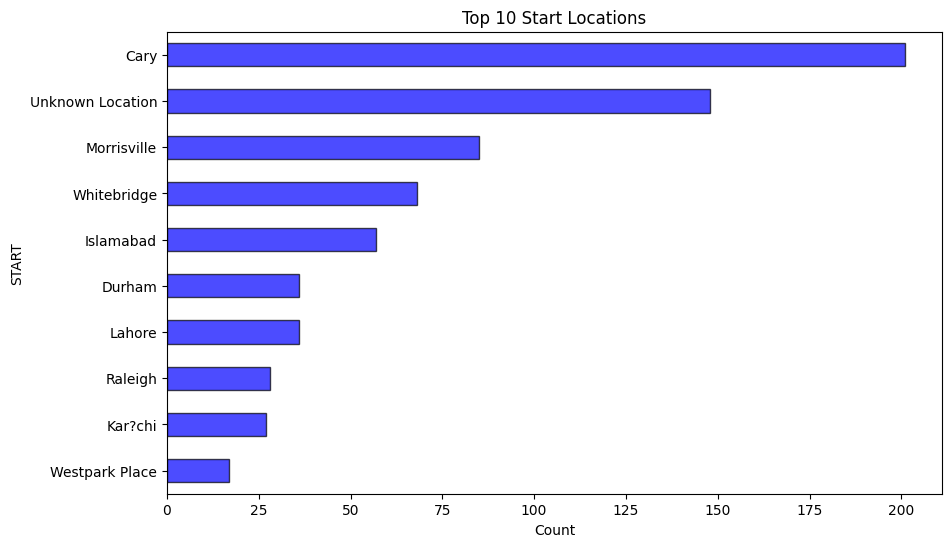

In [163]:
top_start_locations = df['START'].value_counts().head(10).sort_values()
top_start_locations.plot(kind='barh', figsize=(10, 6), color='blue', edgecolor='black', alpha=0.7)
plt.title('Top 10 Start Locations')
plt.xlabel('Count')
plt.show()

### Detecting Abnormal Trips

In [164]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

def detect_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    return df[z_scores > threshold]

In [165]:
# Detect outliers for trip distance (MILES)
mile_outliers_iqr = detect_outliers_iqr(df, 'MILES')
mile_outliers_zscore = detect_outliers_zscore(df, 'MILES')

# Detect outliers for trip duration (TRIP_DURATION)
duration_outliers_iqr = detect_outliers_iqr(df, 'TRIP_DURATION')
duration_outliers_zscore = detect_outliers_zscore(df, 'TRIP_DURATION')

df['IS_MILE_OUTLIER'] = df['MILES'].isin(mile_outliers_iqr['MILES']) | df['MILES'].isin(mile_outliers_zscore['MILES'])
df['IS_DURATION_OUTLIER'] = df['TRIP_DURATION'].isin(duration_outliers_iqr['TRIP_DURATION']) | df['TRIP_DURATION'].isin(duration_outliers_zscore['TRIP_DURATION'])

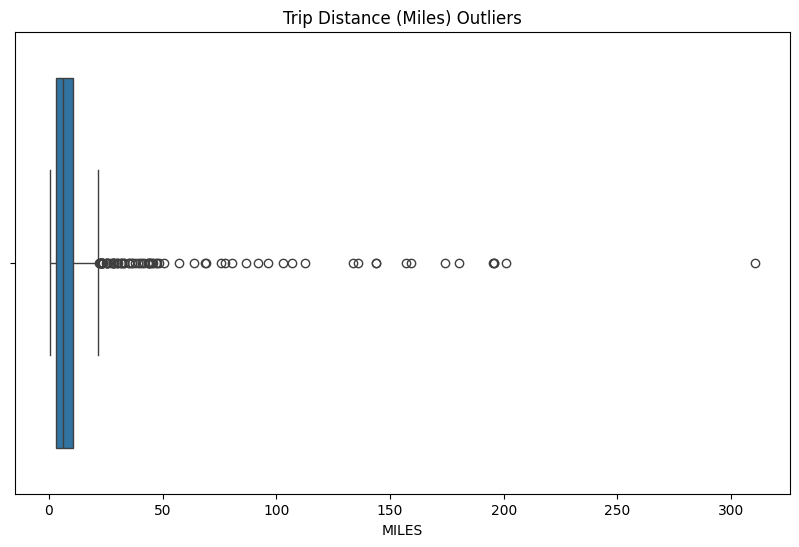

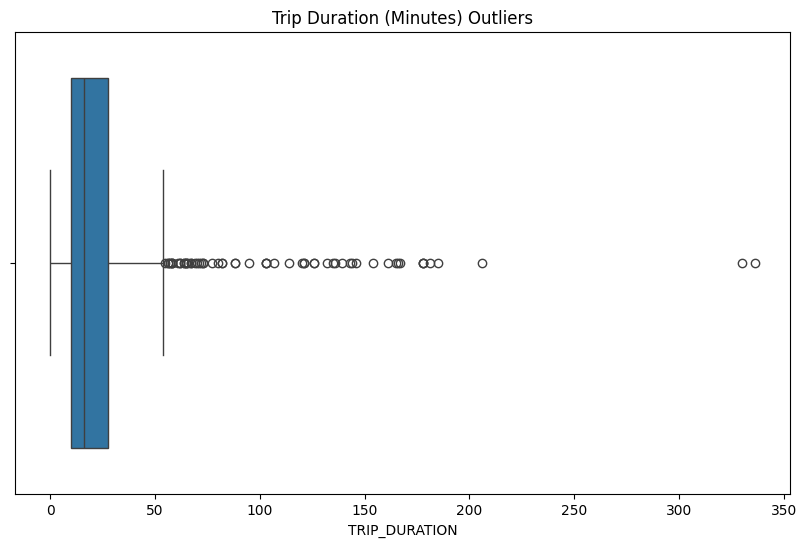

In [166]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['MILES'])
plt.title('Trip Distance (Miles) Outliers')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['TRIP_DURATION'])
plt.title('Trip Duration (Minutes) Outliers')
plt.show()

In [168]:
print(f"Unusually long/short trips by distance: {df['IS_MILE_OUTLIER'].sum()}")
print(f"Unusually long/short trips by duration: {df['IS_DURATION_OUTLIER'].sum()}")


extreme_trips = df[df['IS_MILE_OUTLIER'] | df['IS_DURATION_OUTLIER']]
print(extreme_trips[['START', 'STOP', 'MILES', 'TRIP_DURATION', 'PURPOSE']].head())

Unusually long/short trips by distance: 77
Unusually long/short trips by duration: 62
          START             STOP  MILES  TRIP_DURATION         PURPOSE
4   Fort Pierce  West Palm Beach   63.7           67.0  Customer Visit
22     New York    Queens County   15.1           58.0         Meeting
25      Houston          Houston   21.9           36.0  Customer Visit
36      Raleigh             Cary   40.2           54.0  Customer Visit
62  Chapel Hill             Cary   23.3           33.0  Customer Visit


In [169]:
zero_mile_trips = df[(df['MILES'] == 0) & (df['TRIP_DURATION'] > 0)]
print(f"Trips with 0 miles but non-zero duration: {len(zero_mile_trips)}")

Trips with 0 miles but non-zero duration: 0
